[![バナー画像](http://ai999.careers/bnr_jdla.png)](http://study-ai.com/jdla/)

URL: <http://study-ai.com/jdla/>

# <b>深層学習: Day2

* 学習の流れを復習
 1. 入力層に値を入力
 2. 重み、バイアス、活性化関数で計算しながら値が伝わる
 3. 出力層から値が伝わる
 4. 出力層から出た値と正解値から、誤差関数を使って誤差を求める
 5. 誤差を小さくするために重みやバイアスを更新する
 6. 1～5の操作を繰り返すことにより、出力値を正解値に近づけていく

## <b>Section1: 勾配消失問題

<b>要点まとめ

<b>誤差逆伝播法を用いる場合に、下位層に進んでいくに連れて、勾配がどんどん緩やかになりパラメータがほとんど変化しなくなる勾配消失問題が発生する。これを回避するためにReLU関数など工夫された活性化関数を用いる、初期値を工夫する、バッチ正規化を用いるといったの手法が考案されている。

### <b>Section1の全体像（前回の流れと課題全体像のビジョン）

* 誤差逆伝播法の復習
 * 計算結果（＝誤差）から微分を逆算することで、不要な再帰的計算を避けて微分を算出できる

### <b>確認テスト1

#### <b>【問題】

連鎖率の原理を使い、dz/dxを求めよ。<br>
z = t^2<br>
t = x + y

#### <b>【解答】

dz/dt = 2t<br>
dt/dx = 1<br>
dz/dx = dz/dt・dt/dx = 2t * 1 = 2t = 2(x + y)

#### <b>「確認テスト1」について自身の考察結果

<b>連鎖率の基本的な問題。dz/dxを直接求めることはできないため、いったんdtを介するのがポイント。

* ソースコード

delta2 = functions.d_mean_squared_error(d, y) # 出力層でのデルタ<br>
delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1) # 連鎖率の計算

* 勾配消失問題の復習
 * 誤差逆伝播法が下位層に進んでいくに連れて、勾配がどんどん緩やかになっていく。そのため、勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適値に収束しなくなる。
<br><br>
* 勾配消失の解決方法
 * 活性化関数の選択
 * 重みの初期値設定
 * バッチ正規化

### <b>確認テスト2

#### <b>【問題】

シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。

#### <b>【解答】

0.25

#### <b>「確認テスト2」について自身の考察結果

<b>シグモイド関数f(x) = 1/(1+e^-x)を微分するとf'(x) = (1 - f(x))*f(x)で表される。x = 0のとき、シグモイド関数は最大値f(0) = 1/2をとるため、このときシグモイド関数の微分f'(x)はf'(0) = (1 - (1/2)) * (1/2) = 1/4 = 0.25をとる。

### <b>1-1 活性化関数

* ReLU関数

$$
f(x) = \begin{cases}
    x & (x > 0) \\
    0 & (x \leqq 0)
  \end{cases}
$$

* サンプルコード

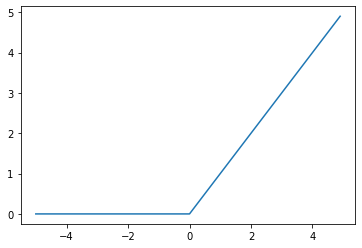

In [1]:
import numpy as np
import matplotlib.pylab as plt

#ReLU関数の定義
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.show()

* 特徴
 * 今最も使われている活性化関数
 * <u>勾配消失問題</u>の回避と<u>スパース化</u>に貢献することで良い成果をもたらしている。

### <b>1-2 初期値の設定方法

* 重みの初期値設定- Xavier（ザビエル）
 * 通常は乱数で初期値を与えるが、Xavierの方法では重みの要素を前の層のノード数の平方根で除算した値を初期値として与える
 * Xavierの初期値を設定する際の活性化関数
   * ReLU関数
   * シグモイド（ロジスティック）関数
   * 双曲線正接関数

* 重みの初期値設定- He
 * Heの初期値では重みの要素を前の層のノード数の平方根で除算した値に対し√2を掛け合わせた値を用いる
 * Heの初期値を設定する際の活性化関数
   * ReLU関数

### <b>確認テスト3

#### <b>【問題】

重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。

#### <b>【解答】

重みの初期値を0にすると正しい学習が行えない。

#### <b>「確認テスト3」について自身の考察結果

<b>すべての重みの値が均一に更新されるため、多数の重みをもつ意味がなくなる（ディープラーニングとして中間層の数を増やしていくことに意味がなくなる）。そのため、初期値は0ではないなんらかの値を与えることが必要となる。

### <b>1-3 バッチ正規化

* バッチ正規化
 * ミニバッチ単位で、入力値のデータの偏りを抑制する手法
<br><br>
* バッチ正規化の使い所
 * 活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える

### <b>確認テスト4

#### <b>【問題】

一般的に考えられるバッチ正規化の効果を2点挙げよ。

#### <b>【解答】

* 学習がうまくいきやすくなる（安定化される）
* 過学習しにくくなる

#### <b>「確認テスト4」について自身の考察結果

<b>例として、4000枚の画像を訓練データと検証データとして8:2に分割する場合、3200枚の訓練データを一度に学習することは計算負荷が大きく困難となるため、小分けに分割したミニバッチごとに学習が行われる。バッチ正規化では各層において活性化関数を掛ける前に伝播してきたデータを正規化するという処理を加える。

<b>【参考文献】日本ディープラーニング協会, ディープラーニングG検定公式テキスト, 2018, p153-154

### <b>例題チャレンジ1

#### <b>【問題】

特徴データdata_x, ラベルデータdata_tに対してミニバッチ学習を行う以下のプログラムについて、（き）にあてはまるのはどれか。

In [1]:
# def train(data_x, data_t, n_epoch, batch_size):
#    """
#    data_x: training data (features)
#    data_t: training data (labels)
#    e_epoch: number of epochs
#    batch_size: mini batch size
#    """
#    N = len(data_x)
#    for epoch in range(n_epoch):
#        shuffle_idx = np.random.permutation(N)
#        for i in range(0, N, batch_size):
#            i_end = i + batch_size
#            batch_x, batch_t = （   き   ）
#            _update(batch_x, batch_t)

#### <b>【解答】

In [5]:
def train(data_x, data_t, n_epoch, batch_size):
   """
   data_x: training data (features)
   data_t: training data (labels)
   e_epoch: number of epochs
   batch_size: mini batch size
   """
   N = len(data_x)
   for epoch in range(n_epoch):
       shuffle_idx = np.random.permutation(N)
       for i in range(0, N, batch_size):
           i_end = i + batch_size
           batch_x, batch_t = data_x[i:i_end], data_t[i:i_end]
           _update(batch_x, batch_t)

data_x[i:i_end], data_t[i:i_end]

バッチサイズだけデータを取り出す処理を行っている。

## <b>Section2: 学習率最適化手法

<b>要点まとめ

<b>勾配降下法を用いて誤差関数を最小化するパラメータを導出する際に、学習率をどのように設定するかが重要となる。学習率設定手法としてはモメンタム、AdaGrad、RMSProp、Adamなどの手法が存在する。新しい手法ほどより効率化が進んでおり、現在はRMSPropもしくはAdamが用いられるケースがほとんどとなっている。

### <b>Section2の全体像（前回の流れと課題全体像のビジョン）

* 深層学習の目的
 * 学習を通して誤差を最小にするネットワークを作成する（誤差E(w)を最小化するパラメータwを発見する）
   * 勾配降下法を利用してパラメータを最適化
<br><br>
* 学習率の復習
 * 学習率が大きすぎると最適値にたどり着かず発散、小さすぎると収束までに時間がかかってしまう
<br><br>
* 初期の学習率設定方法の指針
 * 初期の学習率を大きく設定し、徐々に学習率を小さくしていく
   * パラメータごとに学習率を可変させる
     * 以下で紹介する学習率最適化手法を利用する

### <b>2-1 モメンタム

* 数式
$$
 V_{t} = \mu V_{t-1} - \epsilon \nabla E
$$

* コード<br>
self.v[key] = self.momentum* self.v[key] -self.learning_rate* grad[key]

* 特徴
 * 誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する（勾配降下法がジグザグ運転のような動きをするのに対し、モメンタムは株価の移動平均のような動きをする）。
<br><br>
* メリット
 * 局所的最適解にはならず、大域的最適解となる。
 * 谷間についてから最も低い位置(最適値)にいくまでの時間が早い。

### <b>確認テスト5

#### <b>【問題】

モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。

#### <b>【解答】

* モメンタム
 * 誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する
* AdaGrad
 * 誤差をパラメータで微分したものと再定義した学習率の積を減算する
* RMSProp
 * gradの大きさに応じて学習率を調整する

#### <b>「確認テスト5」について自身の考察結果

<b>モメンタムは1990年代に提唱された手法で、物理でいう慣性の考え方を適用し最適化の進行方向に学習を加速させることで学習の停滞を防ぐ手法。AdaGradはオンライン学習で学習率を自動調整する手法。RMSPropはgradの大きさに応じて学習率を調整する手法であり、現在用いられているのはRMSPropとAdamがほとんどとなっている。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p148
    * [AdaGradのすすめ](https://qiita.com/ak11/items/7f63a1198c345a138150), 2020.12.19 アクセス
    * [【2020決定版】スーパーわかりやすい最適化アルゴリズム -損失関数からAdamとニュートン法-](https://qiita.com/omiita/items/1735c1d048fe5f611f80#:~:text=6.-,RMSProp,%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%81%AE%E3%81%A7%E3%81%97%E3%81%9F%E3%80%82&text=RMSProp%E3%81%AFgrad%E3%81%AE%E5%A4%A7%E3%81%8D,%E8%AA%BF%E6%95%B4%E3%81%99%E3%82%8B%E3%80%81%E3%81%A8%E3%81%84%E3%81%86%E3%82%82%E3%81%AE%E3%81%A7%E3%81%99%E3%80%82), 2020.12.19 アクセス

### <b>2-2 AdaGrad

* 数式
$$
h_{0} = \theta
$$
$$
h_{t} = h_{t-1} + (\nabla E)^{2}
$$
$$
w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_{t}} + \theta} \nabla E
$$

* コード<br>
self.h[key] = np.zeros_like(val)<br>
self.h[key] += grad[key] * grad[key]<br>
params[key] -= self.learning_rate* grad[key] / (np.sqrt(self.h[key]) + 1e-7)

* 特徴
 * 誤差をパラメータで微分したものと再定義した学習率の積を減算する
<br><br>
* メリット
 * 勾配の緩やかな斜面に対して、最適値に近づける
<br><br>
* 課題
 * 学習率が徐々に小さくなるので、鞍点問題を引き起こす事があった

### <b>2-3 RMSProp

* 数式
$$
h_{t} = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^{2}
$$
$$
w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_{t}} + \theta} \nabla E
$$

* コード<br>
self.h[key] * = self.decay_rate<br>
self.h[key] += (1 -self.decay_rate) * grad[key] * grad[key]<br>
params[key] -= self.learning_rate* grad[key] / (np.sqrt(self.h[key]) + 1e-7)

* 特徴
 * 誤差をパラメータで微分したものと再定義した学習率の積を減算する
<br><br>
* RMSPropのメリット
 * 局所的最適解にはならず、大域的最適解となる。
 * ハイパーパラメータの調整が必要な場合が少ない

### <b>2-4 Adam

* 特徴
 * モメンタムの、過去の勾配の指数関数的減衰平均
 * RMSPropの、過去の勾配の2乗の指数関数的減衰平均上記をそれぞれ孕んだ最適化アルゴリズム
 <br><br>
* メリット
 * モメンタムおよびRMSPropのメリットを孕んだアルゴリズム

## <b>Section3: 過学習

<b>要点まとめ

<b>勾配降下法を用いて誤差関数を最小化させるパラメータを導出する際に、過学習を防ぐことがモデルの汎化性能を保つ上で重要となる。過学習の原因にはパラメータ数やノード数の多さなどが挙げられ、それを防ぐ手法としてL1, L2正則化（LASSO正則化やRidge正則化とも呼ばれる）という正則化手法やドロップアウトなどの手法がある。

### <b>Section3の全体像（前回の流れと課題全体像のビジョン）

* 過学習の復習
 * テスト誤差と訓練誤差とで学習曲線が乖離すること（特定の訓練サンプルに対して、特化して学習する）
 * 原因
   * パラメータの数が多い
   * パラメータの値が適切ではない
   * ノードが多い

### <b>3-1 L1正則化、L2正則化

* 正則化
 * ネットワークの自由度(層数、ノード数、パラメータの値etc...)を制約すること
   * 正則化手法を利用して過学習を抑制する

### <b>確認テスト6

#### <b>【問題】

機械学習で使われる線形モデルの正則化は、モデルの重みを制限することで可能となる。正則化手法の一つであるリッジ回帰の特徴を述べよ。

#### <b>【解答】

リッジ回帰の場合、隠れ層に対して正則化項を加える。

#### <b>「確認テスト6」について自身の考察結果

<b>線形回帰に対してL1正則化を適用した手法をLASSO回帰、L2正則化を適用した手法をRedge回帰という。また、両者を組み合わせた手法をElastic Netという。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p110
    * [リッジ回帰の実装](https://qiita.com/K_Noguchi/items/3f5cf527d6f6d46767fb#:~:text=%E3%83%AA%E3%83%83%E3%82%B8%E5%9B%9E%E5%B8%B0%E3%81%A8%E3%81%AF%E9%81%8E,%E4%B8%80%E3%81%A4%E3%81%A8%E3%82%82%E8%A8%80%E3%81%88%E3%81%BE%E3%81%99%E3%80%82), 2020.12.19 アクセス

* 過学習の原因
 * 重みが大きい値をとることで、過学習が発生することがある。
   * 学習させていくと、重みにばらつきが発生する。重みが大きい値は、学習において重要な値であり、重みが大きいと過学習が起こる過学習がおこりそうな重みの大きさ以下で重みをコントロールし、かつ重みの大きさにばらつきを出す必要がある。
<br><br>
* 過学習の解決策
 * 誤差に対して、正則化項を加算することで、重みを抑制する
   * 学習させていくと、重みにばらつきが発生する。重みが大きい値は、学習において重要な値であり、重みが大きいと過学習が起こる過学習がおこりそうな重みの大きさ以下で重みをコントロールし、かつ重みの大きさにばらつきを出す必要がある。

* 数式
$$
E_{n}(w) + \frac{1}{p} \lambda || x ||_{p} 
$$
$$
|| x ||_{p}  = (|x_{1}|^{p} + \cdots + |x_{n}|^{p})^{\frac{1}{p}}
$$

p = 1のときL1正則化（LASSO回帰、マンハッタン距離を用いる）、p = 2のときL2正則化（Ridge回帰、ユークリッド距離を用いる）と呼ぶ。

* コード<br>
np.sum(np.abs(network.params['W' + str(idx)]))<br>
weight_decay+= weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))<br>
loss = network.loss(x_batch, d_batch) + weight_decay

### <b>確認テスト7

#### <b>【問題】

L1正則化を表しているグラフはどちらか答えよ。

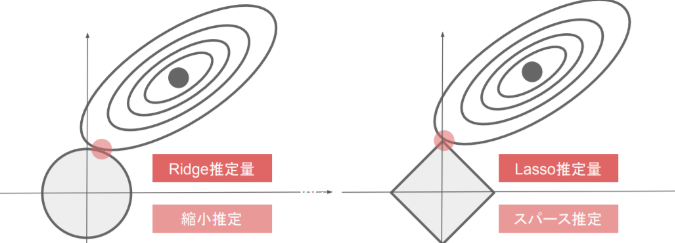

#### <b>【解答】

L1正則化は右図（LASSO回帰）

#### <b>「確認テスト7」について自身の考察結果

* <b>L1正則化
    * 一部のパラメータの値をゼロにすることで特徴選択を行うようにする手法。
* <b>L2正則化
    * パラメータの大きさに応じてゼロに近づけることで、汎化されたなめらかなモデルを得る手法。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p110

### <b>例題チャレンジ2

#### <b>【問題】

あるパラメータparamと正則化がないときにそのパラメータに伝播される誤差の勾配gradが与えられたとする。最終的に勾配を計算する（え）にあてはまるのは何か。ただし、rateはL2正則化の係数を表すとする。

In [2]:
# def ridge(param, grad, rate):
#     """
#     param: target parameter
#     grad: gradients to param
#     rate: ridge coefficient
#     """
#     grad += rate * (   え   )

#### <b>【解答】

In [4]:
def ridge(param, grad, rate):
    """
    param: target parameter
    grad: gradients to param
    rate: ridge coefficient
    """
    grad += rate * (param)

param

L2ノルムは、||param||^2なのでその勾配が誤差の勾配に加えられる。つまり、2 * paramであるが、係数2は正則化の係数に吸収されても変わらないのでparamとなる。

### <b>例題チャレンジ3

#### <b>【問題】

あるパラメータparamと正則化がないときにそのパラメータに伝播される誤差の勾配gradが与えられたとする。最終的に勾配を計算する（お）にあてはまるのは何か。ただし、rateはL1正則化の係数を表すとする。

In [3]:
# def lasso(param, grad, rate):
#     """
#     param: target parameter
#     grad: gradients to param
#     rate: lasso coefficient
#     """
#     x = (   お   )
#     grad += rate * x

#### <b>【解答】

In [1]:
def lasso(param, grad, rate):
    """
    param: target parameter
    grad: gradients to param
    rate: lasso coefficient
    """
    x = (sign(param))
    grad += rate * x

sign(param)

L1ノルムは|param|でありその勾配が誤差の勾配に加えられるため、sign(param)となる。

### <b>例題チャレンジ4

#### <b>【問題】

画像をランダムに切り取る処理を行う以下のプログラムにおいて、（か）に当てはまるものは何か。

In [4]:
# def random_crop(image, crop_size):
#     """
#     image: (height, width, channel)
#     crop_size: (crop_height, crop_width)
#     height >= crop_height, width >= crop_width
#     """
#     h, w, _ = image.shape
#     crop_h, crop_w = crop_size
#     
#     # 切り取る位置をランダムに決める
#     top = np.random.randint(0, h - crop_h)
#     left = np.random.randint(0, w - crop_w)
#     bottom = top + crop_h
#     right = left + crop_w
#     
#     image = (   か   )
#     return image

#### <b>【解答】

In [2]:
def random_crop(image, crop_size):
    """
    image: (height, width, channel)
    crop_size: (crop_height, crop_width)
    height >= crop_height, width >= crop_width
    """
    h, w, _ = image.shape
    crop_h, crop_w = crop_size
    
    # 切り取る位置をランダムに決める
    top = np.random.randint(0, h - crop_h)
    left = np.random.randint(0, w - crop_w)
    bottom = top + crop_h
    right = left + crop_w
    
    image = (image[top:bottom, left:right, :])
    return image

image[top:bottom, left:right, :] 

imageの形式が(縦幅, 横幅, チャンネル)であるのも考慮する。

### <b>3-2 ドロップアウト

* 過学習の課題
 * ノードの数が多い
   * ドロップアウトでランダムにノードを削除することで、過学習を防ぐ（データ量を変化させずに、異なるモデルを学習させていると解釈できる）

## <b>Section4: 畳み込みニューラルネットワークの概念

<b>要点まとめ

<b>畳み込みニューラルネットワーク（CNN）では、畳み込み層とプーリング層を用いた演算が行われる。畳み込み層ではバイアス、パディング、ストライド、チャンネルなどの情報を基にフィルタ演算処理を施す。プーリング層では最大値や平均値等あらかじめ与えられたルールに基づき特徴抽出を行う層である。

### <b>Section4の全体像（CNNの構造図）

* CNNの構造
 * 入力層（入力画像）
 * 畳み込み層
 * 畳み込み層
 * プーリング層
 * 畳み込み層
 * 畳み込み層
 * プーリング層
 * 全結合層
 * 出力層（出力画像）

### <b>4-1 畳み込み層

* 畳み込み層
 * 畳み込み層では、画像の場合、縦、横、チャンネルの3次元のデータをそのまま学習し、次に伝えることができる（3次元の空間情報も学習できるような層が畳み込み層である）。

#### <b>4-1-1 バイアス

* 畳み込みの演算概念（バイアス）

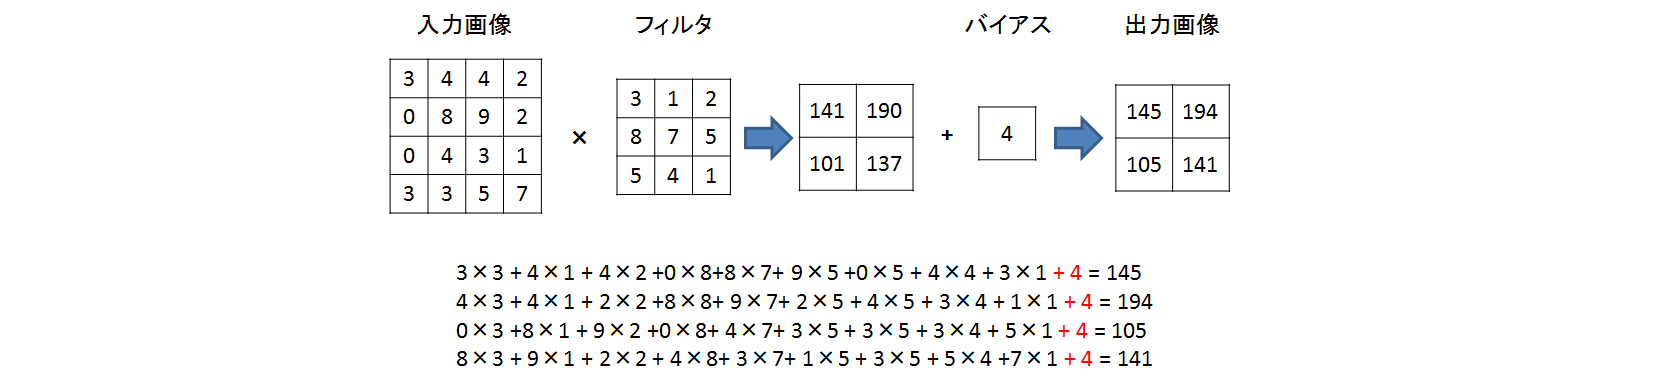

#### <b>4-1-2 パディング

* 畳み込みの演算概念（パディング）

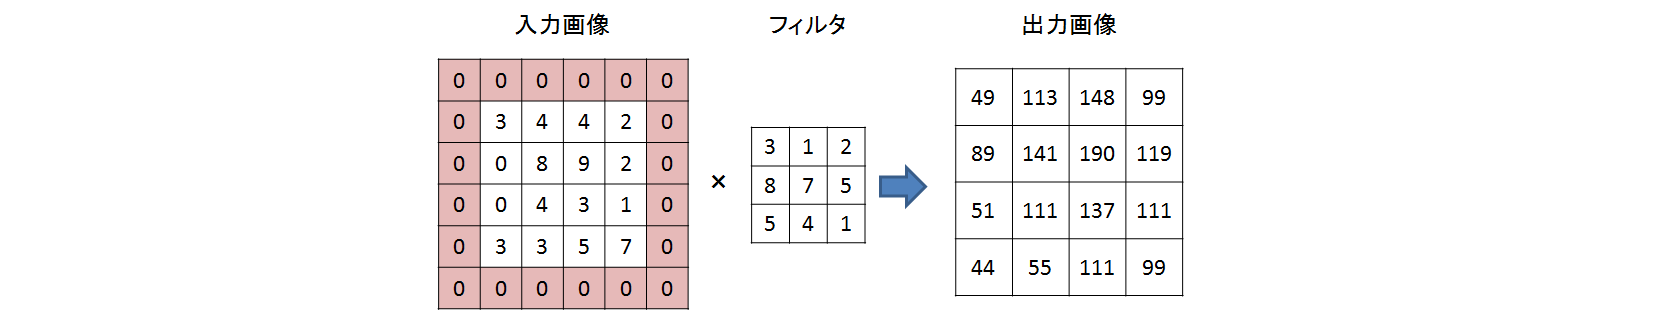

0で埋めればゼロパディング（ゼロでなくともよい）。

#### <b>4-1-3 ストライド

* 畳み込みの演算概念（ストライド）（ストライド: 2の場合）

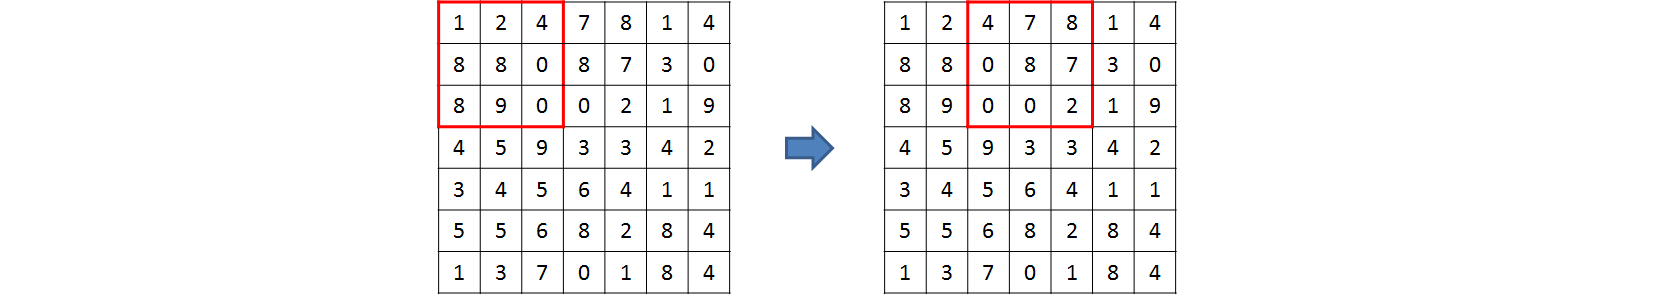

#### <b>4-1-4 チャンネル

* 畳み込みの演算概念（チャンネル）

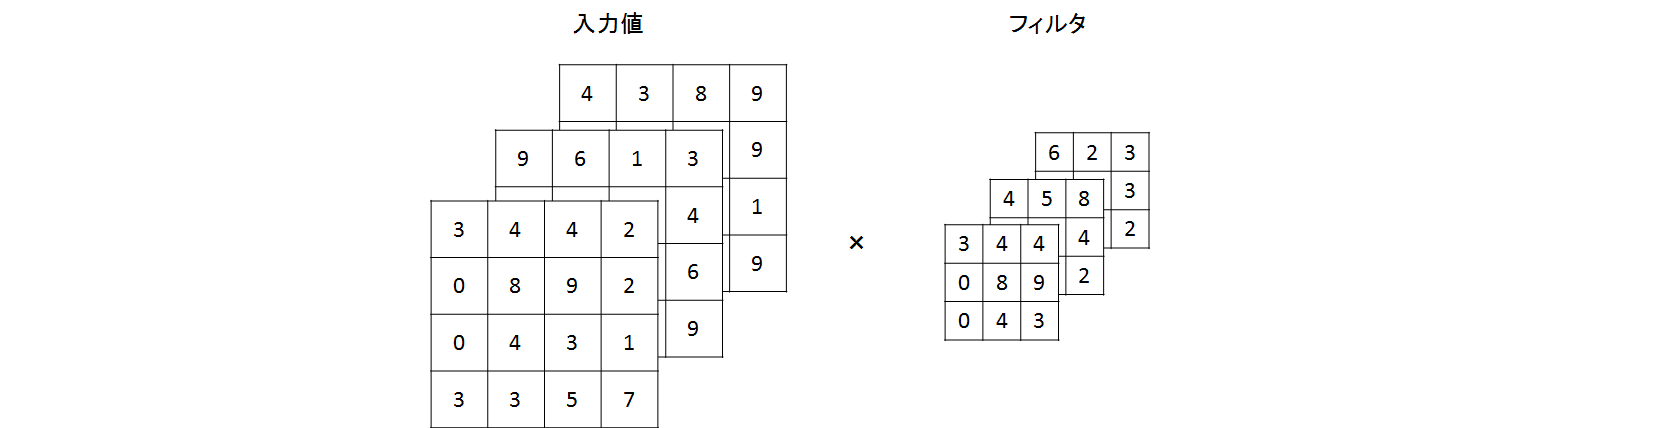

### <b>4-2 プーリング層

* プーリング層の演算概念

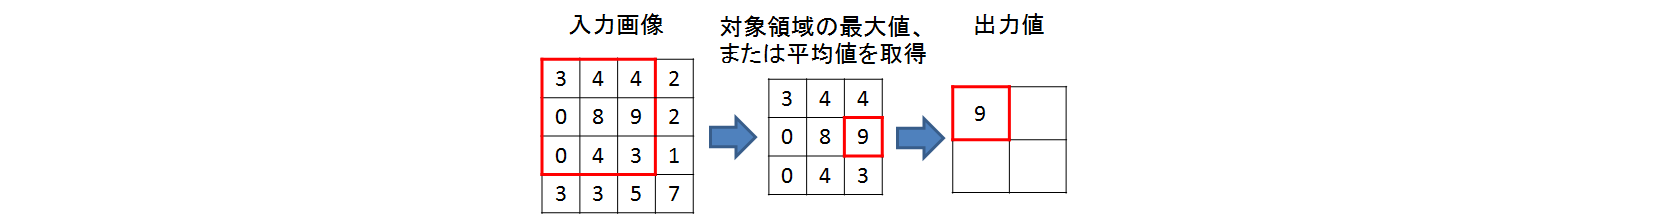

### <b>確認テスト8

#### <b>【問題】

サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。

#### <b>【解答】

7×7

#### <b>「確認テスト8」について自身の考察結果

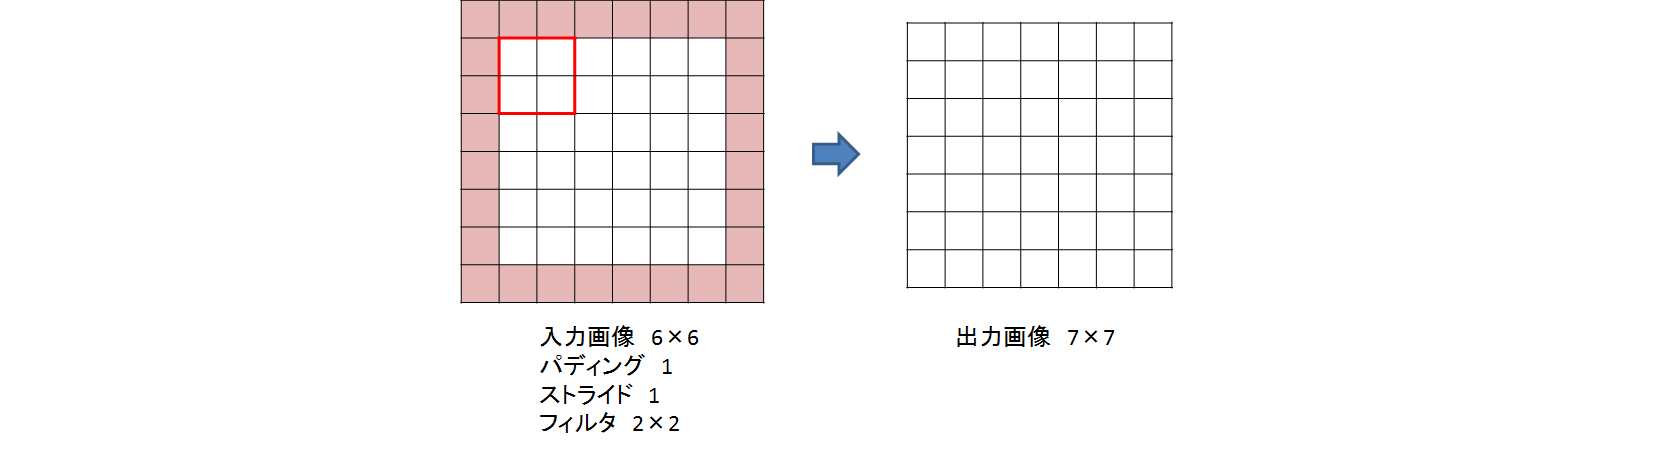

* 公式
 * （出力画像の高さ）＝{（入力画像の高さ）＋2×（パディング）－（フィルタの高さ）}／ストライド + 1
   * h = (6 + 2 * 1 - 2) / 1  + 1 = 6/1 + 1 = 7
 * （出力画像の幅）＝{（入力画像の幅）＋2×（パディング）－（フィルタの幅）}／ストライド + 1
   * w = (6 + 2 * 1 - 2) / 1  + 1 = 6/1 + 1 = 7

## <b>Section5: 最新のCNN

<b>要点まとめ

<b>AlexNetは2012年のイメージネット画像認識コンテスト（ILSVRC）で、従来手法のサポートベクターマシンに代わりディープラーニングに基づくモデルとして初めて優勝したモデルである。AlexNetでは畳み込み層→プーリング層→畳み込み層→プーリング層→畳み込み層→畳み込み層→畳み込み層→プーリング層→全結合層という構造で高い精度をもったモデルとなっている。

### <b>5-1 AlexNet

* AlexNetのモデル説明
 * 5層の畳み込み層およびプーリング層など、それに続く3層の全結合層から構成される。
 * サイズ4096の全結合層の出力にドロップアウトを使用している。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p163, p188